In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob

In [34]:
##Massachusetts
mdfu = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Massachusetts/Streamlined/ma_mayoct.csv')
mdfv = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Massachusetts/Streamlined/ma_yr.csv')
mdfx = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Massachusetts/Streamlined/ma_augoct.csv')
mdfy = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Massachusetts/Streamlined/ma_sepoct.csv')
mmin = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Massachusetts/Streamlined/ma_min.csv')
mmax = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Massachusetts/Streamlined/ma_max.csv')

mmin.rename(
    columns={
        'ndvi':'ndvi_min'
    }, inplace=True
)

mmax.rename(
    columns={
        'ndvi':'ndvi_max'
    }, inplace=True
)

mdfu.rename(
    columns={
        'ndvi':'ndvi_mayoct','savi':'savi_mayoct','wdrvi5':'wdrvi5_mayoct','nd_r_g':'nd_r_g_mayoct', 'nd_g_b':'nd_g_b_mayoct',
        'nd_swir2_nir':'nd_swir2_nir_mayoct', 'nd_swir2_r':'nd_swir2_r_mayoct'
    }, inplace=True
)

mdfv.rename(
    columns={
        'ndvi':'ndvi_yr','savi':'savi_yr','wdrvi5':'wdrvi5_yr','nd_r_g':'nd_r_g_yr', 'nd_g_b':'nd_g_b_yr',
        'nd_swir2_nir':'nd_swir2_nir_yr', 'nd_swir2_r':'nd_swir2_r_yr'
    }, inplace=True
)

mdfx.rename(
    columns={
        'ndvi':'ndvi_augoct','savi':'savi_augoct','wdrvi5':'wdrvi5_augoct','nd_r_g':'nd_r_g_augoct', 'nd_g_b':'nd_g_b_augoct',
        'nd_swir2_nir':'nd_swir2_nir_augoct', 'nd_swir2_r':'nd_swir2_r_augoct'
    }, inplace=True
)

mdfy.rename(
    columns={
        'ndvi':'ndvi_sepoct','savi':'savi_sepoct','wdrvi5':'wdrvi5_sepoct','nd_r_g':'nd_r_g_sepoct', 'nd_g_b':'nd_g_b_sepoct',
        'nd_swir2_nir':'nd_swir2_nir_sepoct', 'nd_swir2_r':'nd_swir2_r_sepoct'
    }, inplace=True
)

mminmax = pd.merge(mmin, mmax, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

mdf0 = pd.merge(mdfv, mdfx, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

mdf0x = pd.merge(mdfu, mdf0, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

mdf = pd.merge(mminmax, mdf0x, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

mdf1 = pd.merge(mdf, mdfy, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

mdf1['ident'] = mdf1['ndvi_yr'] * mdf1['ndvi_augoct'] * mdf1['ndvi_sepoct'] * mdf1['ndvi_mayoct']

mdf1['LTER'] = 'MA'
mdf1.rename(columns={'elevation':'Elevation'}, inplace=True)

display(mdf1)

out_dir = os.path.expanduser('~/Downloads')
out_csv = os.path.join(out_dir, 'jdj.csv')
# mdf1.to_csv(out_csv, index = False)

,Site,Month,Sample size,Year,Latitude,liveMass,Longitude,ndvi_min,B2,B3,...,nd_swir2_r_augoct,ndvi_sepoct,savi_sepoct,wdrvi5_sepoct,nd_r_g_sepoct,nd_g_b_sepoct,nd_swir2_nir_sepoct,nd_swir2_r_sepoct,ident,LTER
0,LTE-MP-LPA,6,4,1999,42.731743,578.075000,-70.842468,NaN,NaN,NaN,...,0.053419,0.288639,0.143973,-0.049452,0.01431,0.136634,-0.238904,0.053419,0.009123,MA
1,LTE-MP-LPA,7,4,1999,42.731743,486.750000,-70.842468,NaN,NaN,NaN,...,0.053419,0.288639,0.143973,-0.049452,0.01431,0.136634,-0.238904,0.053419,0.009123,MA
2,LTE-MP-LPA,8,4,1999,42.731743,389.725000,-70.842468,NaN,NaN,NaN,...,0.053419,0.288639,0.143973,-0.049452,0.01431,0.136634,-0.238904,0.053419,0.009123,MA
3,LTE-MP-LPA,9,4,1999,42.731743,441.625000,-70.842468,NaN,NaN,NaN,...,0.053419,0.288639,0.143973,-0.049452,0.01431,0.136634,-0.238904,0.053419,0.009123,MA
4,LTE-MP-LPA,10,4,1999,42.731743,211.300000,-70.842468,NaN,NaN,NaN,...,0.053419,0.288639,0.143973,-0.049452,0.01431,0.136634,-0.238904,0.053419,0.009123,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,LTE-MP-LPP,7,6,2019,42.730953,718.333333,-70.842918,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MA
207,LTE-MP-LPP,8,6,2019,42.730953,1079.500000,-70.842918,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MA
208,LTE-MP-LPP,9,6,2019,42.730953,758.500000,-70.842918,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MA
209,LTE-MP-LPP,6,6,2020,42.730953,234.833333,-70.842918,0.622197,0.0281,0.0578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MA


In [59]:
##Modeling
df1 = mdf1.copy()
df1 = df1[df1['Month'] == 9]
df1 = df1[df1['ident'].notna()] ##remove rows with NaN for columns used in the model
df1 = df1[df1['Elevation'].notna()]
# df1 = df1[df1['prcp'].notna()] ##CAREFUL; added 7/11/22
# df1 = df1[df1['ndvi_min'].notna()] ##Something wrong with ndvi_min

# df1 = df1[(df1['flats'] < 0.1)] ##TIDAL FILTERING STEP!

df1.drop('ndvi_min', axis=1, inplace=True)
df1.drop('ndvi_max', axis=1, inplace=True)

from sklearn.model_selection import train_test_split
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime

# df1['Date'] = pd.to_datetime(df1.Date, format='%m/%d/%Y')
# df1['DOY'] = df1['Date'].dt.strftime('%j') ##Add day of year (DOY) to dataset
# df1['DOY'] = df1['Date'].dt.strftime('%j').astype('float') ##The astype('float') is only for the regression - not for ML 

xargs=df1[
    [
        'Elevation', 'tmax', 'tmin', 'ndvi_augoct',
        'savi_augoct','wdrvi5_augoct','nd_r_g_augoct','nd_g_b_augoct','nd_swir2_nir_augoct', 'nd_swir2_r_augoct','ndvi_sepoct',
        'savi_sepoct','wdrvi5_sepoct','nd_r_g_sepoct','nd_g_b_sepoct','nd_swir2_nir_sepoct', 'nd_swir2_r_sepoct','ndvi_yr',
        'savi_yr','wdrvi5_yr','nd_r_g_yr','nd_g_b_yr','nd_swir2_nir_yr', 'nd_swir2_r_yr', 'ndvi_mayoct',
        'savi_mayoct','wdrvi5_mayoct','nd_r_g_mayoct','nd_g_b_mayoct','nd_swir2_nir_mayoct', 'nd_swir2_r_mayoct'
    ]
]

yargs=df1['liveMass'] 

##NEED SEASONAL DAYMET DATA
#removed: 'nd_r_g','dayl','sn_prcp', 'sn_dayl', 'sn_srad', 'sn_vp', 'vp', 'srad', 'prcp'

##Include lag variables (e.g. lag ndvi), precip, temp, more

##ELEVATION NEEDS TO BE TRIPLE-CHECKED AT EACH PLOT TO MAKE SURE VALUES CORRESPOND

size_x = 0.2
seed = 0
xargs_train, xargs_test, yargs_train, yargs_test = train_test_split(xargs, yargs, test_size=size_x, random_state = seed) 
## 80% training and 20% test

In [60]:
#Pipeline:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics
pipe = Pipeline([('scaler', StandardScaler()), ('forest', RandomForestRegressor(n_estimators=100, random_state=seed))])
pipe.fit(xargs_train, yargs_train)
y_pred=pipe.predict(xargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yargs_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred)))
r_square = metrics.r2_score(yargs_test, y_pred)
print("The r squared is: " + str(r_square))
print(r_square)
print('testing r2 is: ' + str(pipe.score(xargs_test, yargs_test)))
print('training r2 is: ' + str(pipe.score(xargs_train, yargs_train)))
print('NRMSE is: ' + str(np.sqrt(metrics.mean_squared_error(yargs_test, y_pred))/np.ptp(yargs_test)))

# Mean
print('MEAN BASELINE:')
y_pred_mean = [np.mean(yargs_train)] * len(yargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred_mean))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred_mean)))

# NDVI
print('NDVI BASELINE: unfinished')

Mean Absolute Error: 292.9764583333333
Mean Squared Error: 101498.80804732758
Root Mean Squared Error: 318.588775771099
The r squared is: 0.23664082503102124
0.23664082503102124
testing r2 is: 0.23664082503102124
training r2 is: 0.8701146444520172
NRMSE is: 0.31774146519723967
MEAN BASELINE:
Mean Absolute Error: 355.4205555555556
Root Mean Squared Error: 377.74161277915886
NDVI BASELINE: unfinished


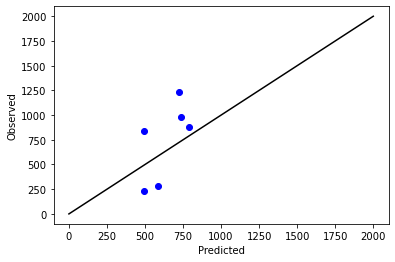

test data correlation coefficient is: 0.6546312636047161
train data correlation coefficient is: 0.9756198007033314


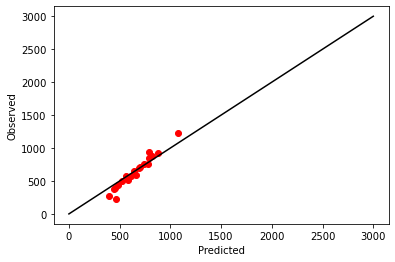

In [61]:
plt.scatter(y_pred, yargs_test, color = 'blue') ##label axes - x,y in order?
# plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 2000], [0, 2000], 'k-')
plt.show()

print('test data correlation coefficient is: ' + str(np.corrcoef(yargs_test, y_pred)[0, 1]))

train_pred = pipe.predict(xargs_train) ##Not sure if this is the right thing to do here
plt.scatter(train_pred, yargs_train, color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 3000], [0, 3000], 'k-')
plt.show

print('train data correlation coefficient is: ' + str(np.corrcoef(train_pred, yargs_train)[0, 1]))

In [49]:
df1

,Site,Month,Sample size,Year,Latitude,liveMass,Longitude,B2,B3,B4,...,nd_swir2_r_augoct,ndvi_sepoct,savi_sepoct,wdrvi5_sepoct,nd_r_g_sepoct,nd_g_b_sepoct,nd_swir2_nir_sepoct,nd_swir2_r_sepoct,ident,LTER
0,LTE-MP-LPA,6,4,1999,42.731743,578.075000,-70.842468,NaN,NaN,NaN,...,0.053419,0.288639,0.143973,-0.049452,0.014310,0.136634,-0.238904,0.053419,0.009123,MA
1,LTE-MP-LPA,7,4,1999,42.731743,486.750000,-70.842468,NaN,NaN,NaN,...,0.053419,0.288639,0.143973,-0.049452,0.014310,0.136634,-0.238904,0.053419,0.009123,MA
2,LTE-MP-LPA,8,4,1999,42.731743,389.725000,-70.842468,NaN,NaN,NaN,...,0.053419,0.288639,0.143973,-0.049452,0.014310,0.136634,-0.238904,0.053419,0.009123,MA
3,LTE-MP-LPA,9,4,1999,42.731743,441.625000,-70.842468,NaN,NaN,NaN,...,0.053419,0.288639,0.143973,-0.049452,0.014310,0.136634,-0.238904,0.053419,0.009123,MA
4,LTE-MP-LPA,10,4,1999,42.731743,211.300000,-70.842468,NaN,NaN,NaN,...,0.053419,0.288639,0.143973,-0.049452,0.014310,0.136634,-0.238904,0.053419,0.009123,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,LTE-MP-LPP,10,6,2015,42.730953,693.333333,-70.842918,NaN,NaN,NaN,...,0.087259,0.491124,0.212578,0.188679,0.040672,0.272403,-0.487701,0.004502,0.069051,MA
172,LTE-MP-LPA,4,2,2016,42.731743,24.900000,-70.842468,NaN,NaN,NaN,...,0.077829,0.491124,0.212578,0.188679,0.040672,0.272403,-0.487701,0.004502,0.033518,MA
173,LTE-MP-LPA,5,2,2016,42.731743,181.950000,-70.842468,NaN,NaN,NaN,...,0.077829,0.491124,0.212578,0.188679,0.040672,0.272403,-0.487701,0.004502,0.033518,MA
174,LTE-MP-LPA,6,2,2016,42.731743,591.400000,-70.842468,NaN,NaN,NaN,...,0.077829,0.491124,0.212578,0.188679,0.040672,0.272403,-0.487701,0.004502,0.033518,MA
